# 2.3 Analyses of combined states - state transitions

In [6]:

""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
from collections import defaultdict
import pandas as pd
from matplotlib import colors as mcolors
from one.api import ONE
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//2_fit_models/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from preprocessing_functions import concatenate_sessions, fix_discontinuities
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//3_postprocess_results/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from postprocessing_functions import remove_states_str, state_identifiability
from plotting_functions import plot_states_aligned, align_bin_design_matrix, states_per_trial_phase, plot_states_aligned_trial, traces_over_sates, traces_over_few_sates

# one = ONE(base_url='https://alyx.internationalbrainlab.org')
one = ONE(mode='remote')

## Parameters

In [168]:
bin_size = 0.1
# bin_size = 0.02

# Plotting params
multiplier = 1/bin_size

event_type_list = ['goCueTrigger_times']  # , 'feedback_times', 'firstMovement_times'
event_type_name = ['Go cue']  # , 'Feedback time', 'First movement onset'

num_train_batches = 5
threshold = 0.01
# threshold = 0

# Values for grid search (should get this from results)
last_lag = 20
lag_step = 2
start_lag = 1
Lags = list(range(start_lag, last_lag, lag_step))
kappas = [0, 1, 5, 10, 100, 500, 1000, 2000, 5000, 7000, 10000]


## Get data

In [169]:
# Load preprocessed data
prepro_results_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/' + str(bin_size) + '/'
os.chdir(prepro_results_path)
idxs, mouse_names, matrix_all, matrix_all_unnorm, session_all = pickle.load(open(prepro_results_path + "preprocessed_data_v4_170724", "rb"))
collapsed_matrices, collapsed_unnorm, collapsed_trials = concatenate_sessions (mouse_names, matrix_all, matrix_all_unnorm, session_all)

## Plot combined states per animal

In [170]:
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me'],
            ['left_X', 'left_Y', 'right_X', 'right_Y'], ['nose_X', 'nose_Y']]
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me'],
            ['left_X', 'left_Y', 'right_X', 'right_Y']]
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me']]
var_interest_map = ['avg_wheel_vel', 'Lick count', 'whisker_me', 'left_X', 'nose_X']
idx_init_list = [0, 1, 2, 3, 7]
idx_end_list = [1, 2, 3, 7, 9]

## Plot overview

In [171]:
exclude_sessions = ['f1db6257-85ef-4385-b415-2d078ec75df2',
'259927fd-7563-4b03-bc5d-17b4d0fa7a55',
'e49d8ee7-24b9-416a-9d04-9be33b655f40',
'6f6d2c8e-28be-49f4-ae4d-06be2d3148c1',
'193fe7a8-4eb5-4f3e-815a-0c45864ddd77',
'f8d5c8b0-b931-4151-b86c-c471e2e80e5d',
'ebc9392c-1ecb-4b4b-a545-4e3d70d23611',
'537677fe-1e24-4755-948c-fa4a4e8ecce5',
'a4747ac8-6a75-444f-b99b-696fff0243fd',
'7be8fec4-406b-4e74-8548-d2885dcc3d5e',
'a71175be-d1fd-47a3-aa93-b830ea3634a1',
'53738f95-bd08-4d9d-9133-483fdb19e8da',
'd901aff5-2250-467a-b4a1-0cb9729df9e2',
'7939711b-8b4d-4251-b698-b97c1eaa846e',
'510b1a50-825d-44ce-86f6-9678f5396e02',
'aad23144-0e52-4eac-80c5-c4ee2decb198',
'd839491f-55d8-4cbe-a298-7839208ba12b',
'72cb5550-43b4-4ef0-add5-e4adfdfb5e02']

session is 934dd7a4-fbdc-459c-8830-04fe9033bc28


/tmp/ipykernel_7920/3163496060.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnorm_mat['Bin'] = matrix_all_unnorm[mouse_name][session]['Bin']
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['prev_choice'][1:] = trials['choice'][:-1]
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:532: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

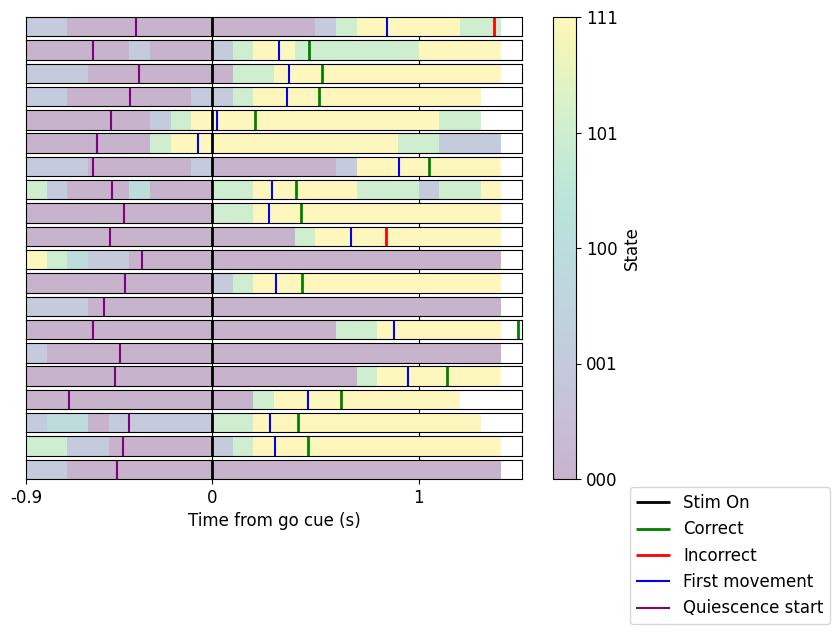

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/3_postprocess_results/plotting_functions.py:783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['new_bin'] = use_data['new_bin'] * bin_size
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]


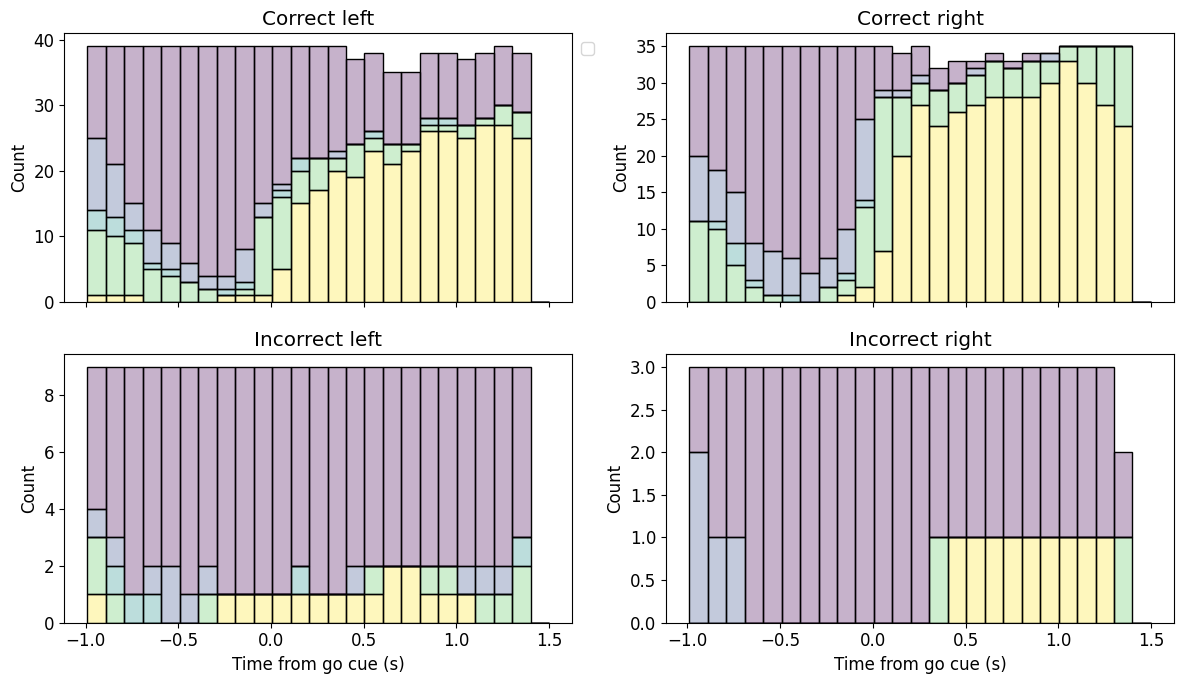

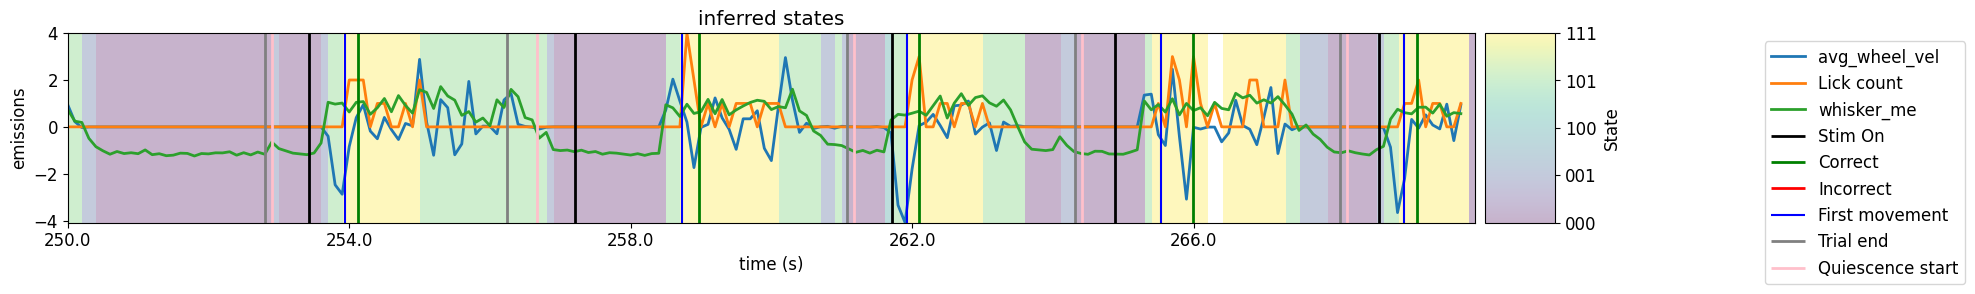

In [172]:
for m, mat in enumerate(idxs[0:1]):
    if len(mat) > 35: 
        # try:
        mouse_name = mat[37:]
        session = mat[0:36]
        mouse_name = 'ZM_3003'
        session = '934dd7a4-fbdc-459c-8830-04fe9033bc28'
        if session not in exclude_sessions:
            print('session is ' +session)
            var_names = ['avg_wheel_vel', 'Lick count', 'whisker_me']

            # Get mouse data          
            session_trials = session_all[mouse_name][session].reset_index()
            design_matrix = matrix_all[mouse_name][session][:,0:3]
            unnorm_mat = matrix_all_unnorm[mouse_name][session][var_names]
            unnorm_mat['Bin'] = matrix_all_unnorm[mouse_name][session]['Bin']

            # Get states per variable and concatenate
            states_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/' + str(bin_size) + '/most_likely_states/'
            os.chdir(states_path)

            c_states = []
            for s, set in enumerate(use_sets):
                
                most_likely_states, _ = pickle.load(open("most_likely_states" + set[0] + '_' + mouse_name + session, "rb"))
                # Save
                if len(c_states) == 0:
                    c_states = most_likely_states
                else:
                    c_states = np.vstack((c_states, most_likely_states))      
            
            combined_states = remove_states_str(c_states.T, threshold)
            
            " Prepare data "
            num_timesteps = np.shape(design_matrix)[0]
            design_matrix_heading = pd.DataFrame(columns=var_names)
            design_matrix_heading[var_names] = design_matrix[0:len(combined_states)]  # TODO: need to understand why number is the same and whether it depends on lag
            bins = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Bin']
            design_matrix_heading['Bin'] = bins
            design_matrix_heading['Lick count'] = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Lick count']
            
            # Transform states into identifiable states
            identifiable_states = state_identifiability(combined_states, design_matrix_heading)
            
            # Change states back to integer
            state_labels = np.unique(identifiable_states)
            int_state = np.arange(0, len(state_labels), 1).astype(float)
            if state_labels[-1] == 'nan':
                int_state[-1] = np.nan
            # Define the mapping as a dictionary
            mapping = {unique: key for unique, key in zip(state_labels, int_state)}
            inverted_mapping = {v: k for k, v in mapping.items()}

            # Use np.vectorize to apply the mapping
            replace_func = np.vectorize(mapping.get)
            new_states = replace_func(identifiable_states)
            num_states = len(np.unique(new_states))

            # Align bins
            init = -1 * multiplier
            end = 1.5 * multiplier
            empirical_data = align_bin_design_matrix(init, end, event_type_list, session_trials, design_matrix_heading, new_states, multiplier)
            empirical_data['identifiable_states'] = identifiable_states
            states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
            
            """ Stack trial states """
            trial_init = 10  # First trial to plot
            trials_to_plot = 20  # How many trials to plot (if very different will compromise readibility)
            plot_states_aligned_trial(trial_init, empirical_data, session_trials, bin_size, trials_to_plot, inverted_mapping)

            " Plot states stacked and aligned per trial type "
            plot_states_aligned(init, end, empirical_data, event_type_name, bin_size, inverted_mapping)
            
            # """ Plot states per trial epoch """
            # colors = sns.color_palette("viridis", num_states)
            # # states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
            # states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
            # sns.histplot(x='label', hue='most_likely_states', data=states_trial, stat = 'percent',
            #                     multiple="stack", legend=True, palette='viridis', alpha=0.3)
            # # plt.figure(figsize=[7, 5])
            # plt.xticks(rotation=45)
            # plt.tight_layout()
            # plt.title(mouse_name)
            # plt.show()
        
            """ Plot raw traces over states """
            init = int(np.min(empirical_data['Bin'])/10+10) * multiplier # First bin
            init = 250*multiplier
            inter = 10 * multiplier
            inter = 20 * multiplier
            traces_over_few_sates(init, inter, empirical_data, session_trials, var_names, multiplier, inverted_mapping)
            
        else:
            print(session)

/tmp/ipykernel_7920/3618606155.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['states_interest'][on] = 1
/tmp/ipykernel_7920/3618606155.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['dif'][1:] = np.diff(use_data['states_interest'])
/tmp/ipykernel_7920/3618606155.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['states_interest'][on] = 1
/tmp/ipykernel_7920/3618606155.py:17: SettingWithCopyWar

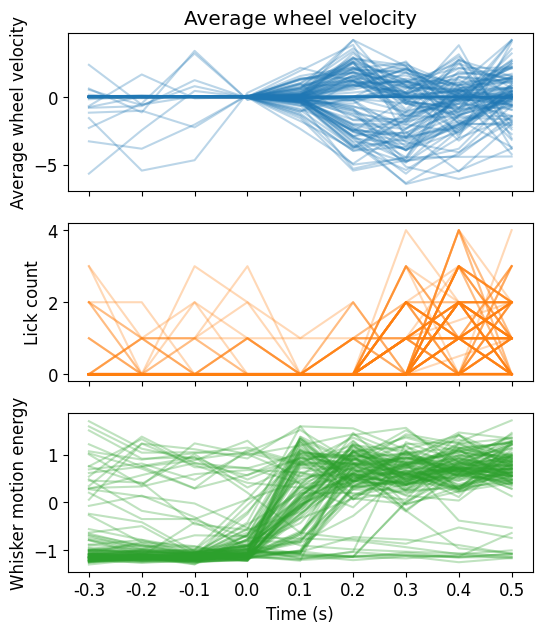

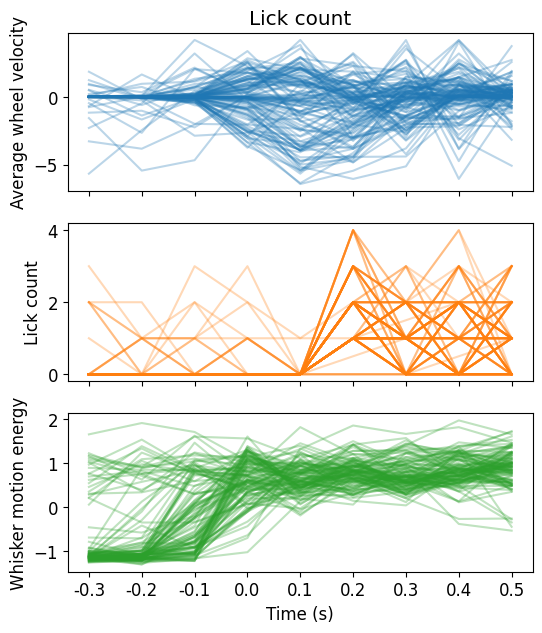

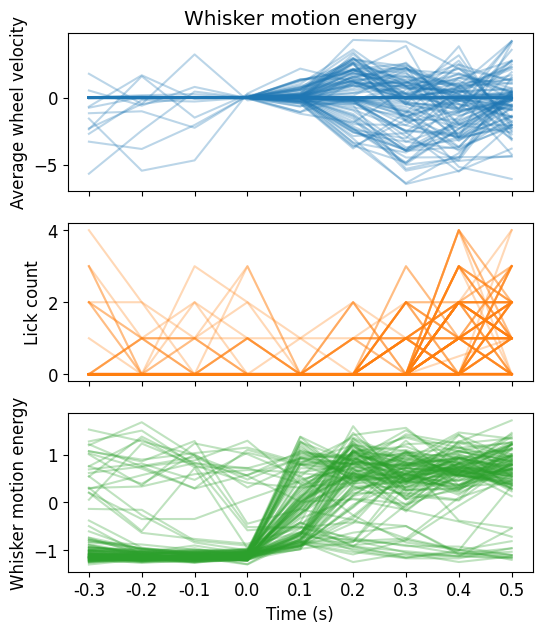

In [221]:
# TODO: plot traces aligned on movement onset
var_names = ['avg_wheel_vel', 'Lick count', 'whisker_me']
plot_var_names = ['Average wheel velocity', 'Lick count', 'Whisker motion energy']
# var_names = ['avg_wheel_vel', 'Lick count']
# plot_var_names = ['Average wheel velocity', 'Lick count']
# # var_names = ['whisker_me']
colors = [sns.color_palette('tab10')[0], sns.color_palette('tab10')[1], sns.color_palette('tab10')[2]]
for r_v, ref_var in enumerate(var_names):
    fig, ax = plt.subplots(ncols=1 , nrows=3, sharex=True, sharey=False, figsize=[6, 7])
    for v, var  in enumerate(var_names):
        use_data = empirical_data.copy()
        check_states = np.array(use_data['identifiable_states'])
        on = [s[r_v] == '1' for s in check_states]
        use_data['states_interest'] = np.zeros(len(use_data))
        use_data['states_interest'][on] = 1
        use_data['dif'] = np.zeros(len(use_data)) * np.nan
        use_data['dif'][1:] = np.diff(use_data['states_interest'])
        
        transition_bins = use_data.loc[use_data['dif']==1., 'Bin'][1:-1]
        aligned_timeseries = np.zeros((len(transition_bins), 10)) * np.nan
        aligned_time = np.zeros((len(transition_bins), 10)) * np.nan
        for b, transition_bin in enumerate(transition_bins):
            snippet = use_data.loc[(use_data['Bin'] > transition_bin - 5) &
                                (use_data['Bin'] < transition_bin + 5), var]
            time_snippet = use_data.loc[(use_data['Bin'] > transition_bin - 5) &
                                (use_data['Bin'] < transition_bin + 5), 'Bin']
            
            aligned_timeseries[b, :len(snippet)] = snippet
            aligned_time[b, :len(snippet)] = time_snippet - (transition_bin-1)
        ax[v].plot(aligned_time.T[:len(snippet), :], aligned_timeseries.T[:len(snippet), :], alpha=0.3, color=colors[v])
        ax[v].set_xticks(aligned_time.T[:len(snippet), 1], [-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])
        # ax[v].set_xticks(aligned_time.T[:len(snippet), 1], [-.4, -.3, -.2, -.1,  .0,  .1,  .2,  .3,  .4])
        ax[v].set_ylabel(plot_var_names[v])
        ax[0].set_title(plot_var_names[r_v])
        ax[2].set_xlabel('Time (s)')


In [216]:
aligned_time.T[:len(snippet), 2]

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [5]:
# Loop through animals
for m, mouse_name in enumerate(mouse_names[0:1]):

    var_names = ['avg_wheel_vel', 'Lick count', 'whisker_me']
    
    # Get mouse data
    session_trials = collapsed_trials[mouse_name].copy()
    design_matrix = collapsed_matrices[mouse_name][:,0:3].copy()  # TODO: find a way for this not to be hardcoded
    unnorm_mat = collapsed_unnorm[mouse_name][var_names].copy()
    unnorm_mat['Bin'] = collapsed_unnorm[mouse_name]['Bin'].copy()
        
    # Get states per variable and concatenate
    states_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/' + str(bin_size) + '/most_likely_states/'
    os.chdir(states_path)

    c_states = []
    for s, set in enumerate(use_sets):
        
        most_likely_states, _ = pickle.load(open("most_likely_states" + set[0] + '_' + mouse_name, "rb"))
        # Save
        if len(c_states) == 0:
            c_states = most_likely_states
        else:
            c_states = np.vstack((c_states, most_likely_states))      
    
    combined_states = remove_states_str(c_states.T, threshold)
        
    # Change states back to integer
    state_labels = np.unique(combined_states)
    int_state = np.arange(0, len(state_labels), 1).astype(float)
    if state_labels[-1] == 'nan':
        int_state[-1] = np.nan
    # Define the mapping as a dictionary
    mapping = {unique: key for unique, key in zip(state_labels, int_state)}

    # Use np.vectorize to apply the mapping
    replace_func = np.vectorize(mapping.get)
    new_states = replace_func(combined_states)

    " Plots "
    # Prepare data 
    num_timesteps = np.shape(design_matrix)[0]
    num_states = len(np.unique(new_states))
    
    # Prepare data
    design_matrix_heading = pd.DataFrame(columns=var_names)
    design_matrix_heading[var_names] = design_matrix[0:len(new_states)]  # TODO: need to understand why number is the same and whether it depends on lag
    bins = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Bin']
    design_matrix_heading['Bin'] = bins
    design_matrix_heading['Lick count'] = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Lick count']
    # Fix discontinuities
    cont_trials, cont_design_matrix_heading = fix_discontinuities(session_trials, design_matrix_heading, multiplier)
    
    # Align bins
    init = -1 * multiplier
    end = 1.5 * multiplier
    empirical_data = align_bin_design_matrix(init, end, event_type_list, cont_trials, cont_design_matrix_heading, new_states, multiplier)


    """ Stack trial states """
    trial_init = 30  # First trial to plot
    trials_to_plot = 20  # How many trials to plot (if very different will compromise readibility)
    plot_states_aligned_trial(trial_init, empirical_data, cont_trials, bin_size, trials_to_plot, num_states)

    # " Plot states stacked and aligned per trial type "
    # # event_type_name = ['Feedback time']
    # plot_states_aligned(init, end, empirical_data, event_type_name, bin_size)
    
    # """ Plot states per trial epoch """
    # colors = sns.color_palette("viridis", num_states)
    # states_trial = states_per_trial_phase(empirical_data, cont_trials, multiplier)
    # plt.figure(figsize=[7, 5])
    # sns.histplot(x='label', hue=0, data=states_trial, stat = 'percent',
    #                     multiple="stack", legend=True, palette='viridis', alpha=0.3)  # stat='frequency',
    # plt.xlabel('Trial phase')
    # plt.legend(loc='upper left', bbox_to_anchor=(1, -0.5))
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.title(mouse_name)
    # plt.show()
    
    # """ Plot raw traces over states """
    # init = 250 * multiplier # First bin
    # inter = 10 * multiplier
    # traces_over_few_sates(init, inter, empirical_data, cont_trials, var_names, multiplier)
    # # traces_over_sates(init, inter, empirical_data, cont_trials)

FileNotFoundError: [Errno 2] No such file or directory: 'most_likely_statesavg_wheel_vel_SWC_052'

In [ ]:
for e, this_event in enumerate(event_type_name):
        
    # PLOT
    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=[12, 7])
    plt.rc('font', size=12)
    use_data = reduced_design_matrix.dropna()
    use_data['new_bin'] = use_data['new_bin'] * bin_size
    #use_data = use_data[:test_length*2]
    
    # Correct left
    a = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==1) 
                                                                            & (use_data['choice']=='left')], stat='count', alpha=0.3, 
                    multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[0, 0], palette='viridis')
    # Correct right
    b = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==1) 
                                                                            & (use_data['choice']=='right')], stat='count', alpha=0.3, 
                    multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[0, 1], palette='viridis')
    # Incorrect left
    c = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==0) 
                                                                            & (use_data['choice']=='left')], stat='count', alpha=0.3,
                    multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[1, 0], palette='viridis')
    # Incorrect right
    d = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==0) 
                                                                            & (use_data['choice']=='right')], alpha=0.3, 
                    stat='count', multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[1, 1], palette='viridis')
    
    ax[0, 0].set_title(str('Correct left'))
    ax[0, 0].set_xlabel(str('Time from go cue (s)'))

    ax[0, 1].set_title(str('Correct right'))
    ax[0, 1].set_xlabel(str('Time from go cue (s)'))
    
    ax[1, 0].set_title(str('Incorrect left'))
    ax[1, 0].set_xlabel(str('Time from go cue (s)'))
    
    ax[1, 1].set_title(str('Incorrect right'))
    ax[1, 1].set_xlabel(str('Time from go cue (s)'))
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_states_aligned(init, end, reduced_design_matrix, event_type_name, bin_size):

    for e, this_event in enumerate(event_type_name):
            
        # PLOT
        fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=[12, 7])
        plt.rc('font', size=12)
        use_data = reduced_design_matrix.dropna()
        use_data['new_bin'] = use_data['new_bin'] * bin_size
        #use_data = use_data[:test_length*2]
        
        # Correct left
        a = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==1) 
                                                                                & (use_data['choice']=='left')], stat='count', alpha=0.3, 
                        multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[0, 0], palette='viridis')
        # Correct right
        b = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==1) 
                                                                                & (use_data['choice']=='right')], stat='count', alpha=0.3, 
                        multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[0, 1], palette='viridis')
        # Incorrect left
        c = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==0) 
                                                                                & (use_data['choice']=='left')], stat='count', alpha=0.3,
                        multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[1, 0], palette='viridis')
        # Incorrect right
        d = sns.histplot(x='new_bin', hue='most_likely_states', data=use_data.loc[(use_data['correct']==0) 
                                                                                & (use_data['choice']=='right')], alpha=0.3, 
                        stat='count', multiple="stack", binwidth=bin_size, binrange=(bin_size*init+0.01, bin_size*end), legend=False, ax = ax[1, 1], palette='viridis')
        
        ax[0, 0].set_title(str('Correct left'))
        ax[0, 0].set_xlabel(str('Time from go cue (s)'))

        ax[0, 1].set_title(str('Correct right'))
        ax[0, 1].set_xlabel(str('Time from go cue (s)'))
        
        ax[1, 0].set_title(str('Incorrect left'))
        ax[1, 0].set_xlabel(str('Time from go cue (s)'))
        
        ax[1, 1].set_title(str('Incorrect right'))
        ax[1, 1].set_xlabel(str('Time from go cue (s)'))
        
        plt.tight_layout()
        plt.show()


# Plot state statistics

In [ ]:
inverted_mapping = {v: k for k, v in mapping.items()}
unique_states = np.array(list(inverted_mapping.keys()))
unique_states = unique_states[~np.isnan(unique_states)]
state_label = np.array(list(mapping.keys()))